# 📈 Statistics for Data Science: Complete Guide

<img src='https://media.licdn.com/dms/image/v2/D4D12AQGVmtVwsf0I4Q/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1685418305972?e=2147483647&v=beta&t=D80sUaywL7e3Cj5qLpxyS04m_Ao1Q5JXsj35bnoBUV0' width='600' alt='Statistics'>

## 🎯 Why Statistics Matters

Statistics is the **language of data**. It helps us:
- **Understand** what data is telling us
- **Make decisions** based on evidence
- **Predict** future outcomes
- **Test** hypotheses scientifically

### 📚 What We'll Master Today:
1. **Descriptive Statistics** - Summarizing data
2. **Probability Basics** - Understanding uncertainty
3. **Distributions** - Patterns in data
4. **Inferential Statistics** - Making conclusions
5. **Hypothesis Testing** - Scientific decision making
6. **Correlation & Regression** - Finding relationships
7. **Statistical Tests** - Choosing the right test
8. **Bayesian Thinking** - Updating beliefs
9. **Time Series** - Analyzing trends
10. **Business Applications** - Real-world statistics

---

## 🚀 Let's Make Statistics Intuitive!

In [2]:
# Import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2, f
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("📈 Statistics for Data Science - Ready to Learn!")
print("\n💡 Remember: Statistics is about understanding patterns, not memorizing formulas!")


c:\Users\RC\miniconda3\envs\ML_Python\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


📈 Statistics for Data Science - Ready to Learn!

💡 Remember: Statistics is about understanding patterns, not memorizing formulas!


---

## 📌 Section 1: Descriptive Statistics - Understanding Your Data

### 🎯 The First Step in Any Analysis

📊 MEASURES OF CENTRAL TENDENCY
Dataset: Employee Salaries (n=98)

📊 Central Tendency:
Mean (Average): $60.82k
Median (Middle): $51.84k
Mode (Most Common): $23.80k


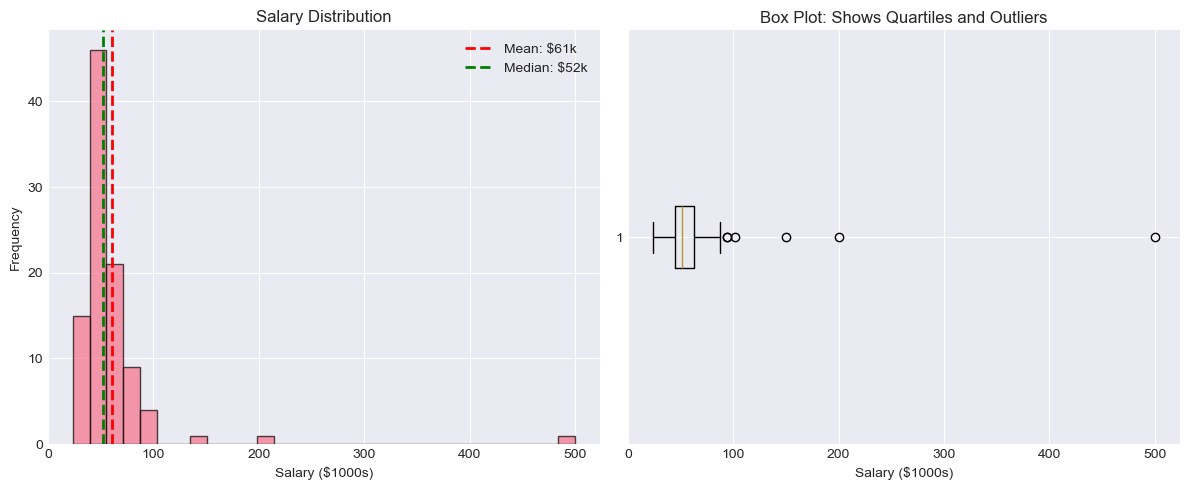


💡 Insight: When data has outliers (like CEO salaries),
   median is often more representative than mean!


In [4]:
# 1.1 Measures of Central Tendency
print("📊 MEASURES OF CENTRAL TENDENCY\n" + "="*40)

# Create sample data - Employee salaries (in $1000s)
np.random.seed(42)
salaries = np.concatenate([
    np.random.normal(50, 10, 80),  # Regular employees
    np.random.normal(80, 15, 15),  # Managers
    [150, 200, 500]  # Executives
])

# Calculate measures
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
mode_salary = stats.mode(salaries, keepdims=True).mode[0]

print(f"Dataset: Employee Salaries (n={len(salaries)})")
print(f"\n📊 Central Tendency:")
print(f"Mean (Average): ${mean_salary:.2f}k")
print(f"Median (Middle): ${median_salary:.2f}k")
print(f"Mode (Most Common): ${mode_salary:.2f}k")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with measures
ax1.hist(salaries, bins=30, alpha=0.7, edgecolor='black')
ax1.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary:.0f}k')
ax1.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_salary:.0f}k')
ax1.set_xlabel('Salary ($1000s)')
ax1.set_ylabel('Frequency')
ax1.set_title('Salary Distribution')
ax1.legend()

# Box plot
ax2.boxplot(salaries, vert=False)
ax2.set_xlabel('Salary ($1000s)')
ax2.set_title('Box Plot: Shows Quartiles and Outliers')

plt.tight_layout()
plt.show()

print("\n💡 Insight: When data has outliers (like CEO salaries),")
print("   median is often more representative than mean!")




📏 MEASURES OF SPREAD
📊 Spread Measures:
Range: $476.20k
Variance: 2515.19
Standard Deviation: $50.15k
IQR (Q3-Q1): $18.10k
Coefficient of Variation: 82.5%

📊 Percentiles:
10th percentile: $37.47k
25th percentile: $44.72k
50th percentile: $51.84k
75th percentile: $62.81k
90th percentile: $78.13k


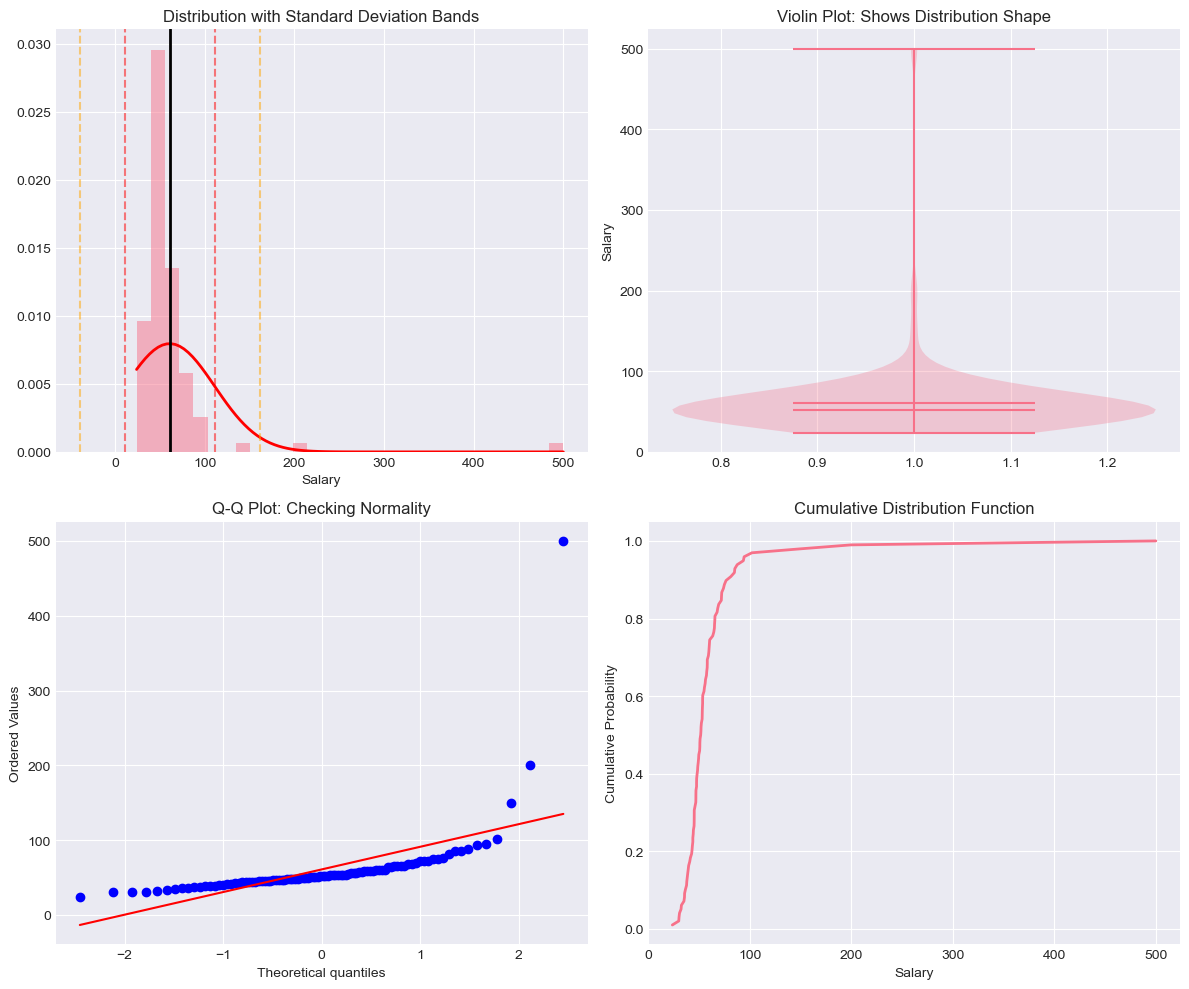

In [5]:
# 1.2 Measures of Spread
print("📏 MEASURES OF SPREAD\n" + "="*40)

# Calculate spread measures
variance = np.var(salaries)
std_dev = np.std(salaries)
salary_range = np.max(salaries) - np.min(salaries)
iqr = np.percentile(salaries, 75) - np.percentile(salaries, 25)
cv = (std_dev / mean_salary) * 100  # Coefficient of variation

print("📊 Spread Measures:")
print(f"Range: ${salary_range:.2f}k")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: ${std_dev:.2f}k")
print(f"IQR (Q3-Q1): ${iqr:.2f}k")
print(f"Coefficient of Variation: {cv:.1f}%")

# Percentiles
percentiles = [10, 25, 50, 75, 90]
print("\n📊 Percentiles:")
for p in percentiles:
    value = np.percentile(salaries, p)
    print(f"{p}th percentile: ${value:.2f}k")

# Visualize spread
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution with std bands
ax = axes[0, 0]
ax.hist(salaries, bins=30, alpha=0.5, density=True)
x = np.linspace(salaries.min(), salaries.max(), 100)
ax.plot(x, norm.pdf(x, mean_salary, std_dev), 'r-', linewidth=2)
ax.axvline(mean_salary, color='black', linestyle='-', linewidth=2)
ax.axvline(mean_salary - std_dev, color='red', linestyle='--', alpha=0.5)
ax.axvline(mean_salary + std_dev, color='red', linestyle='--', alpha=0.5)
ax.axvline(mean_salary - 2*std_dev, color='orange', linestyle='--', alpha=0.5)
ax.axvline(mean_salary + 2*std_dev, color='orange', linestyle='--', alpha=0.5)
ax.set_title('Distribution with Standard Deviation Bands')
ax.set_xlabel('Salary')

# Violin plot
ax = axes[0, 1]
ax.violinplot([salaries], showmeans=True, showmedians=True)
ax.set_title('Violin Plot: Shows Distribution Shape')
ax.set_ylabel('Salary')

# QQ plot
ax = axes[1, 0]
stats.probplot(salaries, dist="norm", plot=ax)
ax.set_title('Q-Q Plot: Checking Normality')

# Cumulative distribution
ax = axes[1, 1]
sorted_salaries = np.sort(salaries)
cumulative = np.arange(1, len(sorted_salaries) + 1) / len(sorted_salaries)
ax.plot(sorted_salaries, cumulative, linewidth=2)
ax.set_xlabel('Salary')
ax.set_ylabel('Cumulative Probability')
ax.set_title('Cumulative Distribution Function')
ax.grid(True)

plt.tight_layout()
plt.show()




📐 SHAPE OF DISTRIBUTION
Skewness: 7.112
  → Positively skewed (tail on right)

Kurtosis: 57.740
  → Heavy tails (more outliers than normal)


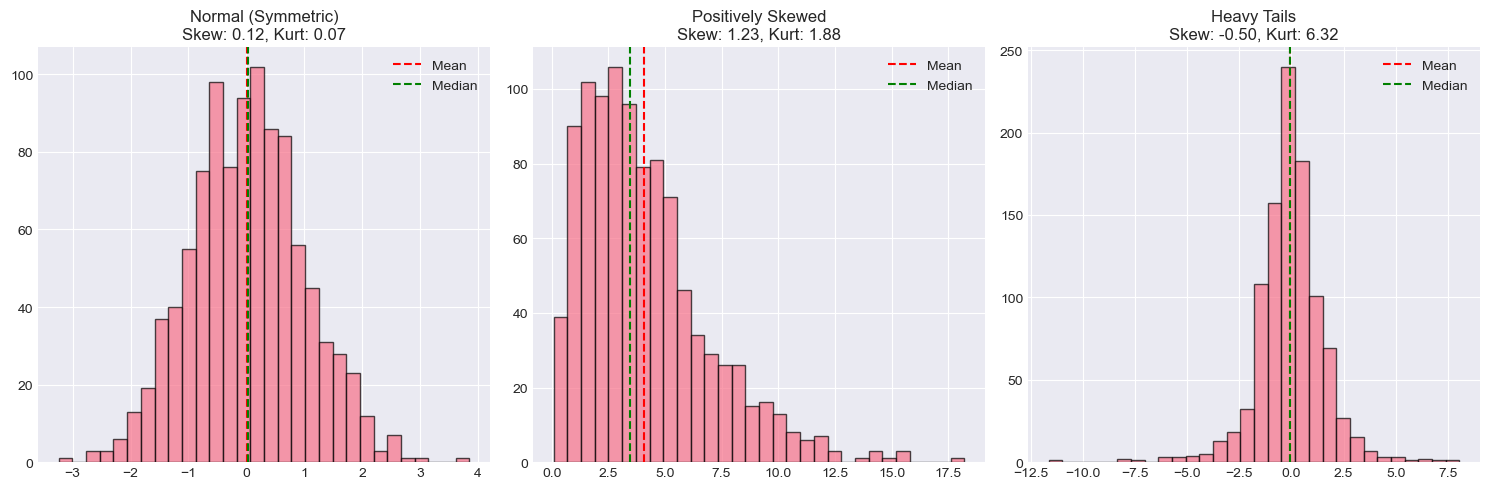

In [6]:
# 1.3 Skewness and Kurtosis

print("📐 SHAPE OF DISTRIBUTION\n" + "="*40)

from scipy.stats import skew, kurtosis

# Calculate shape measures
skewness = skew(salaries)
kurt = kurtosis(salaries)

print(f"Skewness: {skewness:.3f}")
if skewness > 0.5:
    print("  → Positively skewed (tail on right)")
elif skewness < -0.5:
    print("  → Negatively skewed (tail on left)")
else:
    print("  → Approximately symmetric")

print(f"\nKurtosis: {kurt:.3f}")
if kurt > 0:
    print("  → Heavy tails (more outliers than normal)")
elif kurt < 0:
    print("  → Light tails (fewer outliers than normal)")
else:
    print("  → Similar to normal distribution")

# Create different distributions for comparison
np.random.seed(42)
normal_dist = np.random.normal(0, 1, 1000)
skewed_dist = np.random.gamma(2, 2, 1000)
heavy_tail = np.random.standard_t(3, 1000)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

distributions = [normal_dist, skewed_dist, heavy_tail]
titles = ['Normal (Symmetric)', 'Positively Skewed', 'Heavy Tails']

for ax, dist, title in zip(axes, distributions, titles):
    ax.hist(dist, bins=30, alpha=0.7, edgecolor='black')
    ax.axvline(np.mean(dist), color='red', linestyle='--', label='Mean')
    ax.axvline(np.median(dist), color='green', linestyle='--', label='Median')
    ax.set_title(f'{title}\nSkew: {skew(dist):.2f}, Kurt: {kurtosis(dist):.2f}')
    ax.legend()

plt.tight_layout()
plt.show()



---

## 📌 Section 2: Probability Basics - Understanding Uncertainty

### 🎯 The Foundation of Statistical Inference

🎲 PROBABILITY BASICS
Coin Flip Experiment (1000 flips):
P(Heads) = 0.490
P(Tails) = 0.510


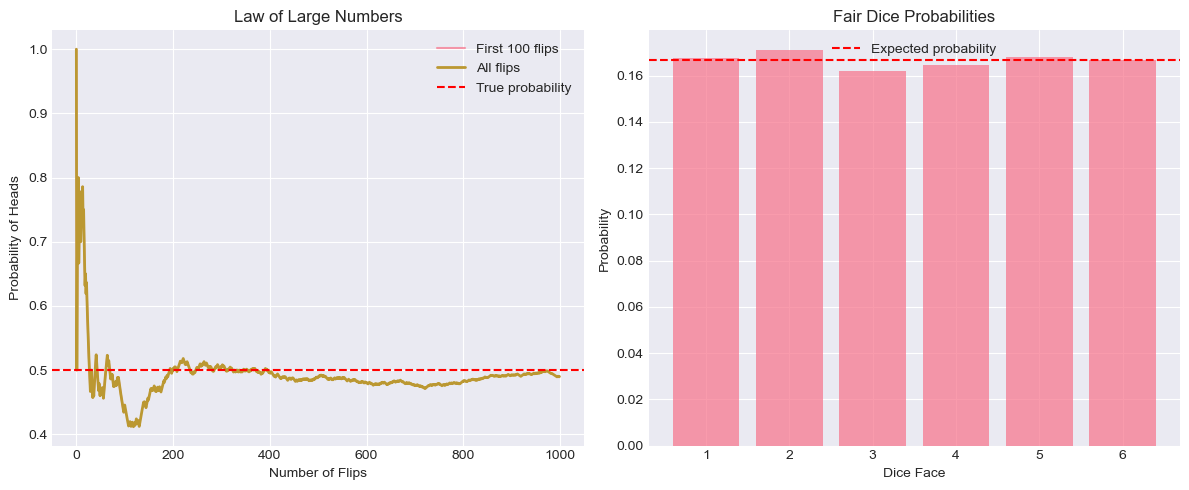

In [5]:
# 2.1 Basic Probability Concepts
print("🎲 PROBABILITY BASICS\n" + "="*40)

# Simulate coin flips
np.random.seed(42)
n_flips = 1000
coin_flips = np.random.choice(['Heads', 'Tails'], n_flips)

# Calculate probabilities
p_heads = np.sum(coin_flips == 'Heads') / n_flips
p_tails = np.sum(coin_flips == 'Tails') / n_flips

print(f"Coin Flip Experiment ({n_flips} flips):")
print(f"P(Heads) = {p_heads:.3f}")
print(f"P(Tails) = {p_tails:.3f}")

# Law of Large Numbers
cumulative_heads = np.cumsum(coin_flips == 'Heads')
cumulative_prob = cumulative_heads / np.arange(1, n_flips + 1)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Law of Large Numbers
ax1.plot(cumulative_prob[:100], label='First 100 flips', alpha=0.7)
ax1.plot(cumulative_prob, label='All flips', linewidth=2)
ax1.axhline(y=0.5, color='red', linestyle='--', label='True probability')
ax1.set_xlabel('Number of Flips')
ax1.set_ylabel('Probability of Heads')
ax1.set_title('Law of Large Numbers')
ax1.legend()
ax1.grid(True)

# Dice rolls - Multiple outcomes
n_rolls = 10000
dice_rolls = np.random.randint(1, 7, n_rolls)
unique, counts = np.unique(dice_rolls, return_counts=True)

ax2.bar(unique, counts/n_rolls, alpha=0.7)
ax2.axhline(y=1/6, color='red', linestyle='--', label='Expected probability')
ax2.set_xlabel('Dice Face')
ax2.set_ylabel('Probability')
ax2.set_title('Fair Dice Probabilities')
ax2.legend()

plt.tight_layout()
plt.show()


🔄 CONDITIONAL PROBABILITY & BAYES
Medical Test Example:
Disease prevalence: 1.0%
Test sensitivity: 95%
Test specificity: 90%

If test is positive:
Probability of having disease: 8.8%

💡 Surprising: Even with a positive test, probability is only 8.8%!


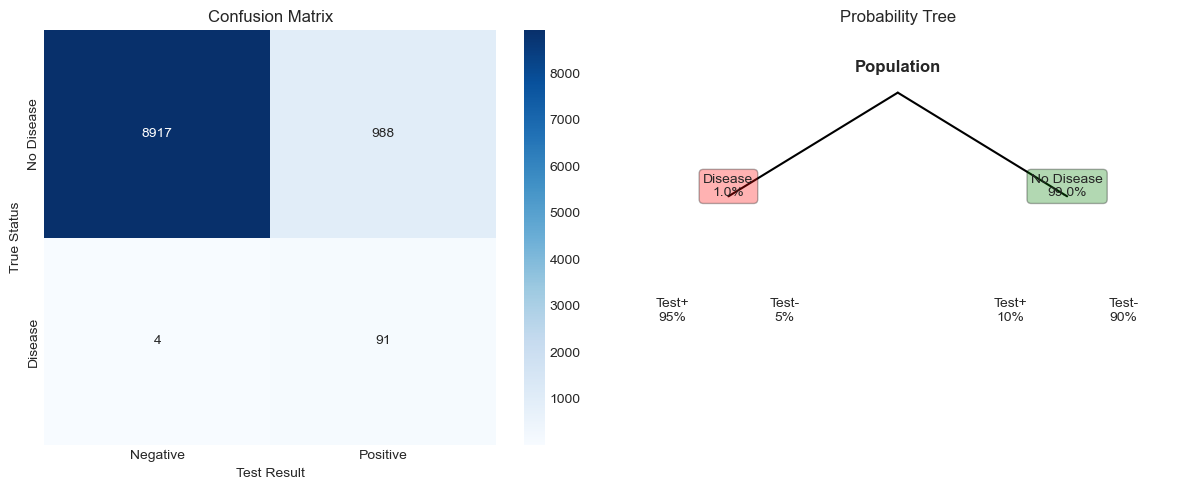

In [6]:
# 2.2 Conditional Probability and Bayes' Theorem
print("🔄 CONDITIONAL PROBABILITY & BAYES\n" + "="*40)

# Medical test example
# Disease prevalence: 1%
# Test sensitivity (true positive rate): 95%
# Test specificity (true negative rate): 90%

p_disease = 0.01
p_no_disease = 1 - p_disease
p_positive_given_disease = 0.95  # Sensitivity
p_negative_given_no_disease = 0.90  # Specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease

# Bayes' Theorem
# P(Disease|Positive) = P(Positive|Disease) * P(Disease) / P(Positive)

p_positive = (p_positive_given_disease * p_disease + 
              p_positive_given_no_disease * p_no_disease)

p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive

print("Medical Test Example:")
print(f"Disease prevalence: {p_disease*100:.1f}%")
print(f"Test sensitivity: {p_positive_given_disease*100:.0f}%")
print(f"Test specificity: {p_negative_given_no_disease*100:.0f}%")
print(f"\nIf test is positive:")
print(f"Probability of having disease: {p_disease_given_positive*100:.1f}%")
print(f"\n💡 Surprising: Even with a positive test, probability is only {p_disease_given_positive*100:.1f}%!")

# Simulate population
population_size = 10000
np.random.seed(42)

# Generate true disease status
has_disease = np.random.random(population_size) < p_disease

# Generate test results
test_results = np.zeros(population_size, dtype=bool)
# For those with disease
test_results[has_disease] = np.random.random(np.sum(has_disease)) < p_positive_given_disease
# For those without disease
test_results[~has_disease] = np.random.random(np.sum(~has_disease)) < p_positive_given_no_disease

# Create confusion matrix
true_positive = np.sum(has_disease & test_results)
false_positive = np.sum(~has_disease & test_results)
true_negative = np.sum(~has_disease & ~test_results)
false_negative = np.sum(has_disease & ~test_results)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
confusion = np.array([[true_negative, false_positive],
                      [false_negative, true_positive]])
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['No Disease', 'Disease'])
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Test Result')
ax1.set_ylabel('True Status')

# Probability tree
ax2.text(0.5, 0.9, 'Population', ha='center', fontsize=12, weight='bold')
ax2.plot([0.5, 0.2], [0.85, 0.6], 'k-')
ax2.plot([0.5, 0.8], [0.85, 0.6], 'k-')
ax2.text(0.2, 0.6, f'Disease\n{p_disease:.1%}', ha='center', bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
ax2.text(0.8, 0.6, f'No Disease\n{p_no_disease:.1%}', ha='center', bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
ax2.text(0.1, 0.3, f'Test+\n{p_positive_given_disease:.0%}', ha='center')
ax2.text(0.3, 0.3, f'Test-\n{1-p_positive_given_disease:.0%}', ha='center')
ax2.text(0.7, 0.3, f'Test+\n{p_positive_given_no_disease:.0%}', ha='center')
ax2.text(0.9, 0.3, f'Test-\n{p_negative_given_no_disease:.0%}', ha='center')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.set_title('Probability Tree')

plt.tight_layout()
plt.show()



---

## 📌 Section 3: Probability Distributions

### 🎯 Patterns in Random Data

📊 PROBABILITY DISTRIBUTIONS


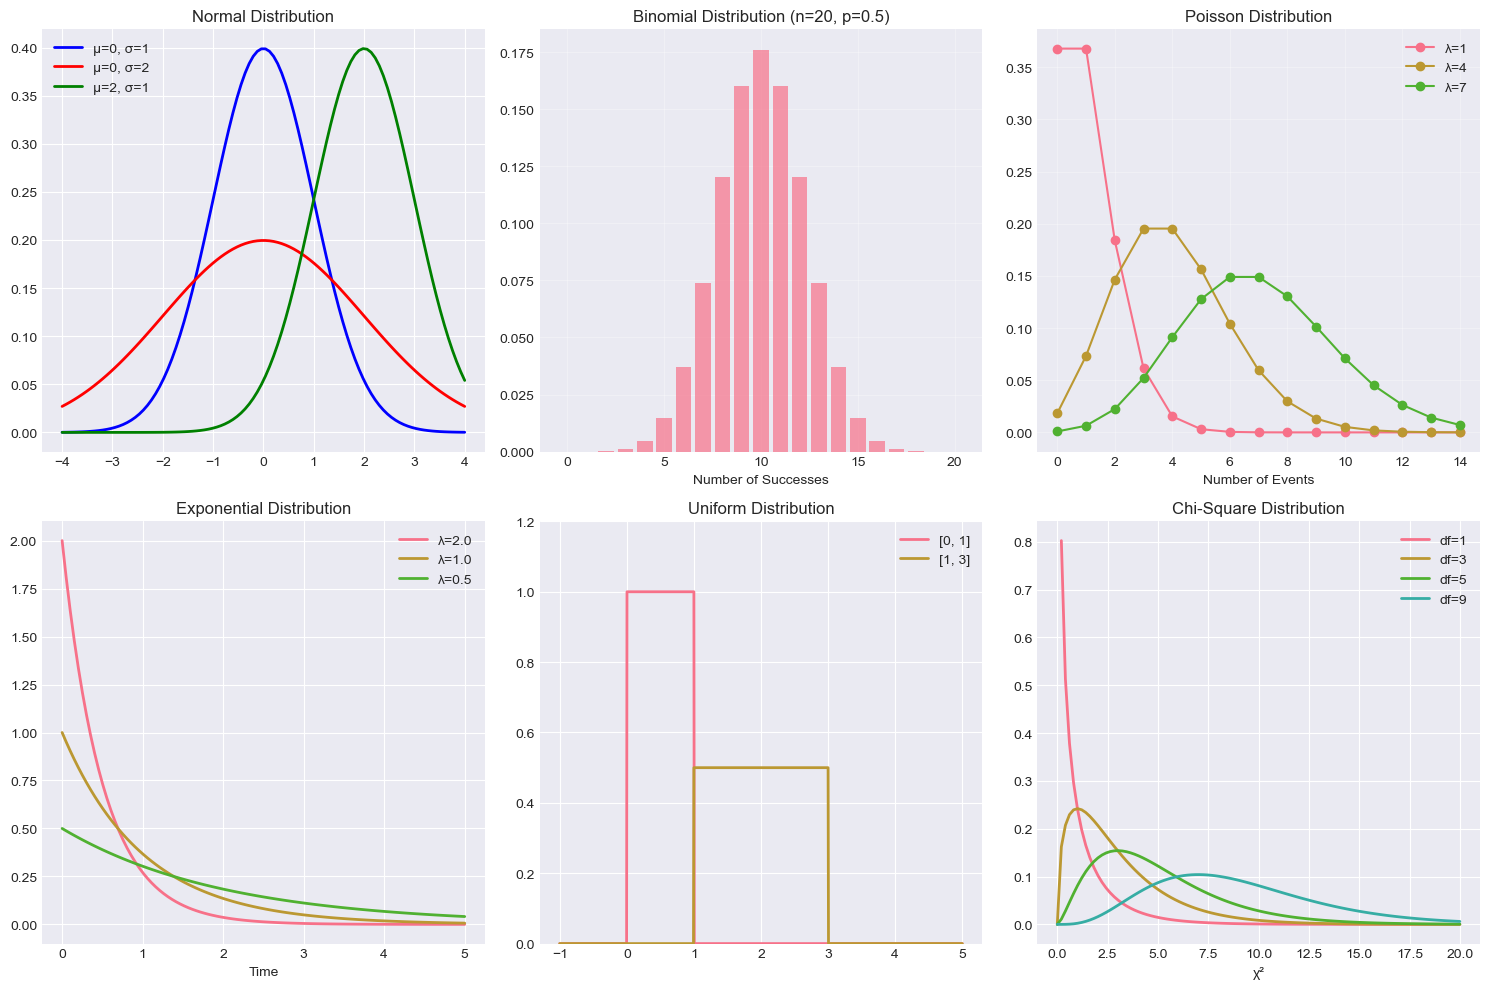


💡 Key Applications:
• Normal: Heights, test scores, measurement errors
• Binomial: Success/failure experiments
• Poisson: Count of events in fixed time
• Exponential: Time between events
• Uniform: Random sampling
• Chi-Square: Goodness of fit tests


In [8]:
# 3.1 Common Distributions
print("📊 PROBABILITY DISTRIBUTIONS\n" + "="*40)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
np.random.seed(42)

# 1. Normal Distribution
ax = axes[0, 0]
x = np.linspace(-4, 4, 100)
ax.plot(x, norm.pdf(x, 0, 1), 'b-', linewidth=2, label='μ=0, σ=1')
ax.plot(x, norm.pdf(x, 0, 2), 'r-', linewidth=2, label='μ=0, σ=2')
ax.plot(x, norm.pdf(x, 2, 1), 'g-', linewidth=2, label='μ=2, σ=1')
ax.set_title('Normal Distribution')
ax.legend()
ax.grid(True)

# 2. Binomial Distribution
ax = axes[0, 1]
n, p = 20, 0.5
x = np.arange(0, n+1)
ax.bar(x, stats.binom.pmf(x, n, p), alpha=0.7)
ax.set_title(f'Binomial Distribution (n={n}, p={p})')
ax.set_xlabel('Number of Successes')
ax.grid(True, alpha=0.3)

# 3. Poisson Distribution
ax = axes[0, 2]
lambdas = [1, 4, 7]
x = np.arange(0, 15)
for lam in lambdas:
    ax.plot(x, stats.poisson.pmf(x, lam), marker='o', label=f'λ={lam}')
ax.set_title('Poisson Distribution')
ax.set_xlabel('Number of Events')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Exponential Distribution
ax = axes[1, 0]
x = np.linspace(0, 5, 100)
for scale in [0.5, 1, 2]:
    ax.plot(x, stats.expon.pdf(x, scale=scale), linewidth=2, label=f'λ={1/scale:.1f}')
ax.set_title('Exponential Distribution')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

# 5. Uniform Distribution
ax = axes[1, 1]
x = np.linspace(-1, 5, 1000)
ax.plot(x, stats.uniform.pdf(x, 0, 1), linewidth=2, label='[0, 1]')
ax.plot(x, stats.uniform.pdf(x, 1, 2), linewidth=2, label='[1, 3]')
ax.set_title('Uniform Distribution')
ax.legend()
ax.grid(True)
ax.set_ylim(0, 1.2)

# 6. Chi-Square Distribution
ax = axes[1, 2]
x = np.linspace(0, 20, 100)
for df in [1, 3, 5, 9]:
    ax.plot(x, stats.chi2.pdf(x, df), linewidth=2, label=f'df={df}')
ax.set_title('Chi-Square Distribution')
ax.set_xlabel('χ²')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

print("\n💡 Key Applications:")
print("• Normal: Heights, test scores, measurement errors")
print("• Binomial: Success/failure experiments")
print("• Poisson: Count of events in fixed time")
print("• Exponential: Time between events")
print("• Uniform: Random sampling")
print("• Chi-Square: Goodness of fit tests")



🎯 CENTRAL LIMIT THEOREM


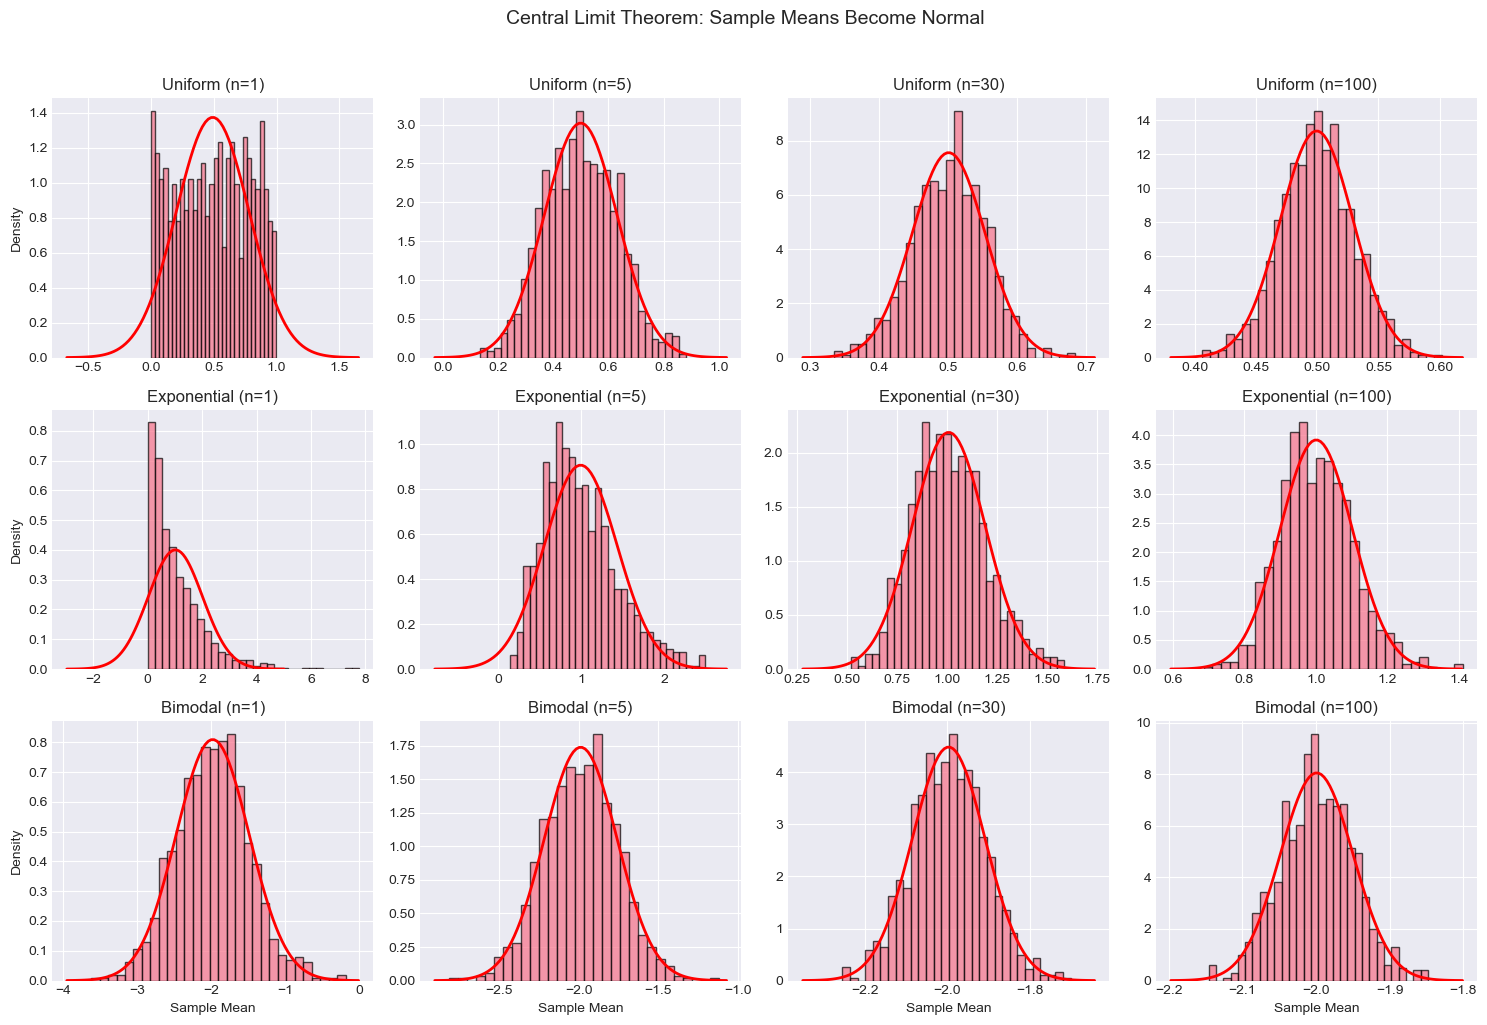


💡 Key Insight:
No matter the original distribution, sample means become normally distributed!
This is why the normal distribution is so important in statistics.


In [9]:
# 3.2 Central Limit Theorem
print("🎯 CENTRAL LIMIT THEOREM\n" + "="*40)

# Demonstrate CLT with different distributions
np.random.seed(42)
n_samples = 1000
sample_sizes = [1, 5, 30, 100]

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Different source distributions
distributions = [
    ('Uniform', lambda: np.random.uniform(0, 1, n_samples)),
    ('Exponential', lambda: np.random.exponential(1, n_samples)),
    ('Bimodal', lambda: np.concatenate([np.random.normal(-2, 0.5, n_samples//2),
                                        np.random.normal(2, 0.5, n_samples//2)]))
]

for row, (dist_name, dist_func) in enumerate(distributions):
    for col, n in enumerate(sample_sizes):
        ax = axes[row, col]
        
        # Generate sample means
        sample_means = []
        for _ in range(1000):
            sample = dist_func()[:n]
            sample_means.append(np.mean(sample))
        
        # Plot histogram
        ax.hist(sample_means, bins=30, density=True, alpha=0.7, edgecolor='black')
        
        # Overlay normal distribution
        mu = np.mean(sample_means)
        sigma = np.std(sample_means)
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
        ax.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)
        
        ax.set_title(f'{dist_name} (n={n})')
        if col == 0:
            ax.set_ylabel('Density')
        if row == 2:
            ax.set_xlabel('Sample Mean')

plt.suptitle('Central Limit Theorem: Sample Means Become Normal', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("No matter the original distribution, sample means become normally distributed!")
print("This is why the normal distribution is so important in statistics.")



---

## 📌 Section 4: Hypothesis Testing

### 🎯 Making Scientific Decisions

🔬 HYPOTHESIS TESTING
A/B Test Results:
Version A: 96/1000 = 9.6% conversion
Version B: 122/1000 = 12.2% conversion
Difference: 2.6 percentage points

Statistical Test:
Z-statistic: 1.866
P-value: 0.0621
Result: NOT SIGNIFICANT (p >= 0.05)
→ Cannot conclude Version B is better


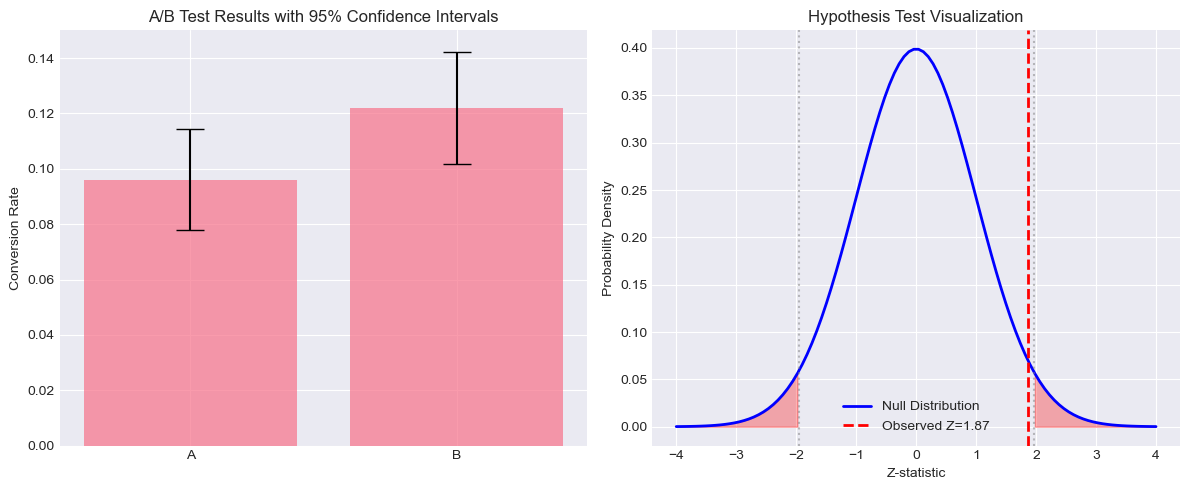

In [10]:
# 4.1 Hypothesis Testing Framework
print("🔬 HYPOTHESIS TESTING\n" + "="*40)

# A/B Testing Example: Website Conversion Rates
np.random.seed(42)

# Simulate data
n_visitors_A = 1000
n_visitors_B = 1000
conversion_rate_A = 0.10  # 10% conversion
conversion_rate_B = 0.12  # 12% conversion (we want to detect this)

# Generate conversions
conversions_A = np.random.binomial(n_visitors_A, conversion_rate_A)
conversions_B = np.random.binomial(n_visitors_B, conversion_rate_B)

# Calculate observed rates
p_A = conversions_A / n_visitors_A
p_B = conversions_B / n_visitors_B

print("A/B Test Results:")
print(f"Version A: {conversions_A}/{n_visitors_A} = {p_A:.1%} conversion")
print(f"Version B: {conversions_B}/{n_visitors_B} = {p_B:.1%} conversion")
print(f"Difference: {(p_B - p_A)*100:.1f} percentage points")

# Two-proportion z-test
pooled_p = (conversions_A + conversions_B) / (n_visitors_A + n_visitors_B)
se = np.sqrt(pooled_p * (1 - pooled_p) * (1/n_visitors_A + 1/n_visitors_B))
z_stat = (p_B - p_A) / se
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"\nStatistical Test:")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Result: SIGNIFICANT (p < {alpha})")
    print("→ Reject null hypothesis: Version B is better!")
else:
    print(f"Result: NOT SIGNIFICANT (p >= {alpha})")
    print("→ Cannot conclude Version B is better")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Conversion rates with confidence intervals
versions = ['A', 'B']
rates = [p_A, p_B]
errors = [1.96 * np.sqrt(p_A*(1-p_A)/n_visitors_A),
          1.96 * np.sqrt(p_B*(1-p_B)/n_visitors_B)]

ax1.bar(versions, rates, yerr=errors, capsize=10, alpha=0.7)
ax1.set_ylabel('Conversion Rate')
ax1.set_title('A/B Test Results with 95% Confidence Intervals')
ax1.set_ylim(0, 0.15)

# Null distribution and test statistic
x = np.linspace(-4, 4, 100)
ax2.plot(x, norm.pdf(x), 'b-', linewidth=2, label='Null Distribution')
ax2.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Z={z_stat:.2f}')
ax2.axvline(-1.96, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(1.96, color='gray', linestyle=':', alpha=0.5)
ax2.fill_between(x[x < -1.96], 0, norm.pdf(x[x < -1.96]), alpha=0.3, color='red')
ax2.fill_between(x[x > 1.96], 0, norm.pdf(x[x > 1.96]), alpha=0.3, color='red')
ax2.set_xlabel('Z-statistic')
ax2.set_ylabel('Probability Density')
ax2.set_title('Hypothesis Test Visualization')
ax2.legend()

plt.tight_layout()
plt.show()

In [11]:
# 4.2 Types of Statistical Tests
print("📋 COMMON STATISTICAL TESTS\n" + "="*40)

# Generate sample datasets
np.random.seed(42)

# 1. One-sample t-test
print("1️⃣ One-Sample T-Test")
print("Question: Is average different from expected value?")
sample = np.random.normal(100, 15, 30)  # IQ scores
t_stat, p_val = stats.ttest_1samp(sample, 100)
print(f"Sample mean: {np.mean(sample):.2f}")
print(f"Test against: 100")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
print()

# 2. Two-sample t-test
print("2️⃣ Two-Sample T-Test")
print("Question: Are two group means different?")
group1 = np.random.normal(100, 15, 50)
group2 = np.random.normal(105, 15, 50)
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"Group 1 mean: {np.mean(group1):.2f}")
print(f"Group 2 mean: {np.mean(group2):.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
print()

# 3. Paired t-test
print("3️⃣ Paired T-Test")
print("Question: Is there a difference before/after treatment?")
before = np.random.normal(120, 10, 30)  # Blood pressure before
after = before - np.random.normal(5, 3, 30)  # After treatment
t_stat, p_val = stats.ttest_rel(before, after)
print(f"Mean before: {np.mean(before):.2f}")
print(f"Mean after: {np.mean(after):.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
print()

# 4. Chi-square test
print("4️⃣ Chi-Square Test")
print("Question: Are categorical variables independent?")
# Create contingency table
observed = np.array([[20, 30], [25, 25]])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)
print("Contingency Table:")
print(observed)
print(f"Chi-square: {chi2_stat:.3f}, p-value: {p_val:.4f}")
print()

# 5. ANOVA
print("5️⃣ ANOVA (Analysis of Variance)")
print("Question: Are means different across multiple groups?")
group_A = np.random.normal(100, 10, 30)
group_B = np.random.normal(105, 10, 30)
group_C = np.random.normal(110, 10, 30)
f_stat, p_val = stats.f_oneway(group_A, group_B, group_C)
print(f"Group A mean: {np.mean(group_A):.2f}")
print(f"Group B mean: {np.mean(group_B):.2f}")
print(f"Group C mean: {np.mean(group_C):.2f}")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")


📋 COMMON STATISTICAL TESTS
1️⃣ One-Sample T-Test
Question: Is average different from expected value?
Sample mean: 97.18
Test against: 100
t-statistic: -1.145, p-value: 0.2616

2️⃣ Two-Sample T-Test
Question: Are two group means different?
Group 1 mean: 98.72
Group 2 mean: 105.33
t-statistic: -2.302, p-value: 0.0234

3️⃣ Paired T-Test
Question: Is there a difference before/after treatment?
Mean before: 119.33
Mean after: 113.87
t-statistic: 10.296, p-value: 0.0000

4️⃣ Chi-Square Test
Question: Are categorical variables independent?
Contingency Table:
[[20 30]
 [25 25]]
Chi-square: 0.646, p-value: 0.4214

5️⃣ ANOVA (Analysis of Variance)
Question: Are means different across multiple groups?
Group A mean: 102.20
Group B mean: 104.69
Group C mean: 108.56
F-statistic: 2.627, p-value: 0.0780


---

## 📌 Section 5: Correlation and Regression

### 🎯 Finding Relationships in Data

🔗 CORRELATION ANALYSIS


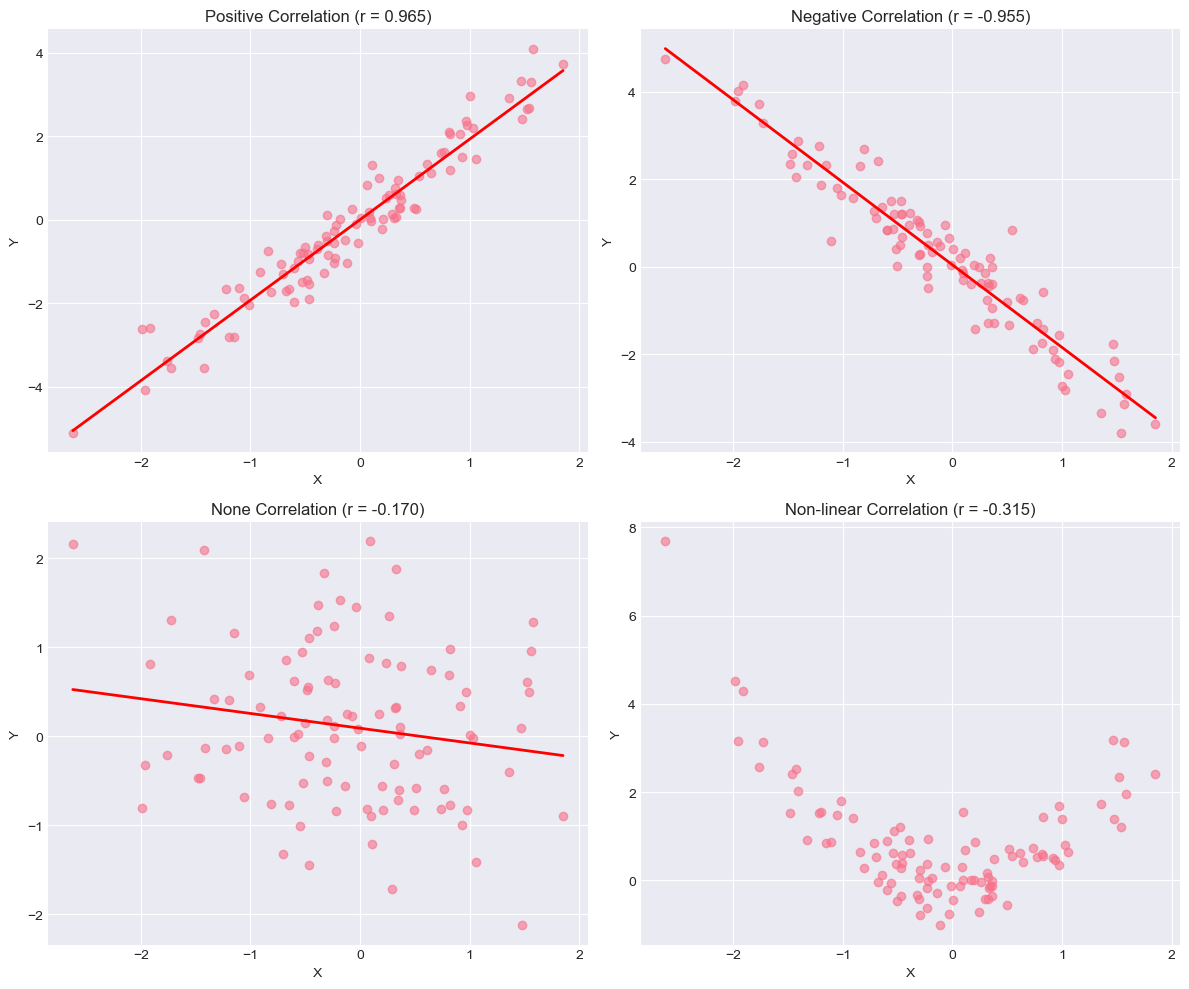


💡 Important Notes:
• Correlation measures LINEAR relationships only
• Correlation ≠ Causation
• Always visualize your data!


In [11]:
# 5.1 Correlation Analysis
print("🔗 CORRELATION ANALYSIS\n" + "="*40)

# Generate correlated data
np.random.seed(42)
n = 100

# Different correlation patterns
x = np.random.randn(n)

# Strong positive correlation
y_pos = 2 * x + np.random.randn(n) * 0.5

# Strong negative correlation
y_neg = -2 * x + np.random.randn(n) * 0.5

# No correlation
y_none = np.random.randn(n)

# Non-linear relationship
y_nonlinear = x**2 + np.random.randn(n) * 0.5

# Calculate correlations
correlations = [
    ('Positive', x, y_pos, np.corrcoef(x, y_pos)[0, 1]),
    ('Negative', x, y_neg, np.corrcoef(x, y_neg)[0, 1]),
    ('None', x, y_none, np.corrcoef(x, y_none)[0, 1]),
    ('Non-linear', x, y_nonlinear, np.corrcoef(x, y_nonlinear)[0, 1])
]

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (title, x_data, y_data, corr) in enumerate(correlations):
    ax = axes[i]
    ax.scatter(x_data, y_data, alpha=0.6)
    ax.set_title(f'{title} Correlation (r = {corr:.3f})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Add regression line for linear relationships
    if i < 3:
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        ax.plot(sorted(x_data), p(sorted(x_data)), 'r-', linewidth=2)

plt.tight_layout()
plt.show()

print("\n💡 Important Notes:")
print("• Correlation measures LINEAR relationships only")
print("• Correlation ≠ Causation")
print("• Always visualize your data!")

📈 LINEAR REGRESSION ANALYSIS
Regression Results:
Equation: Price = 113.35 + 0.1431 × Size
R-squared: 0.908
P-value: 1.3123e-52
Standard error: 0.0046


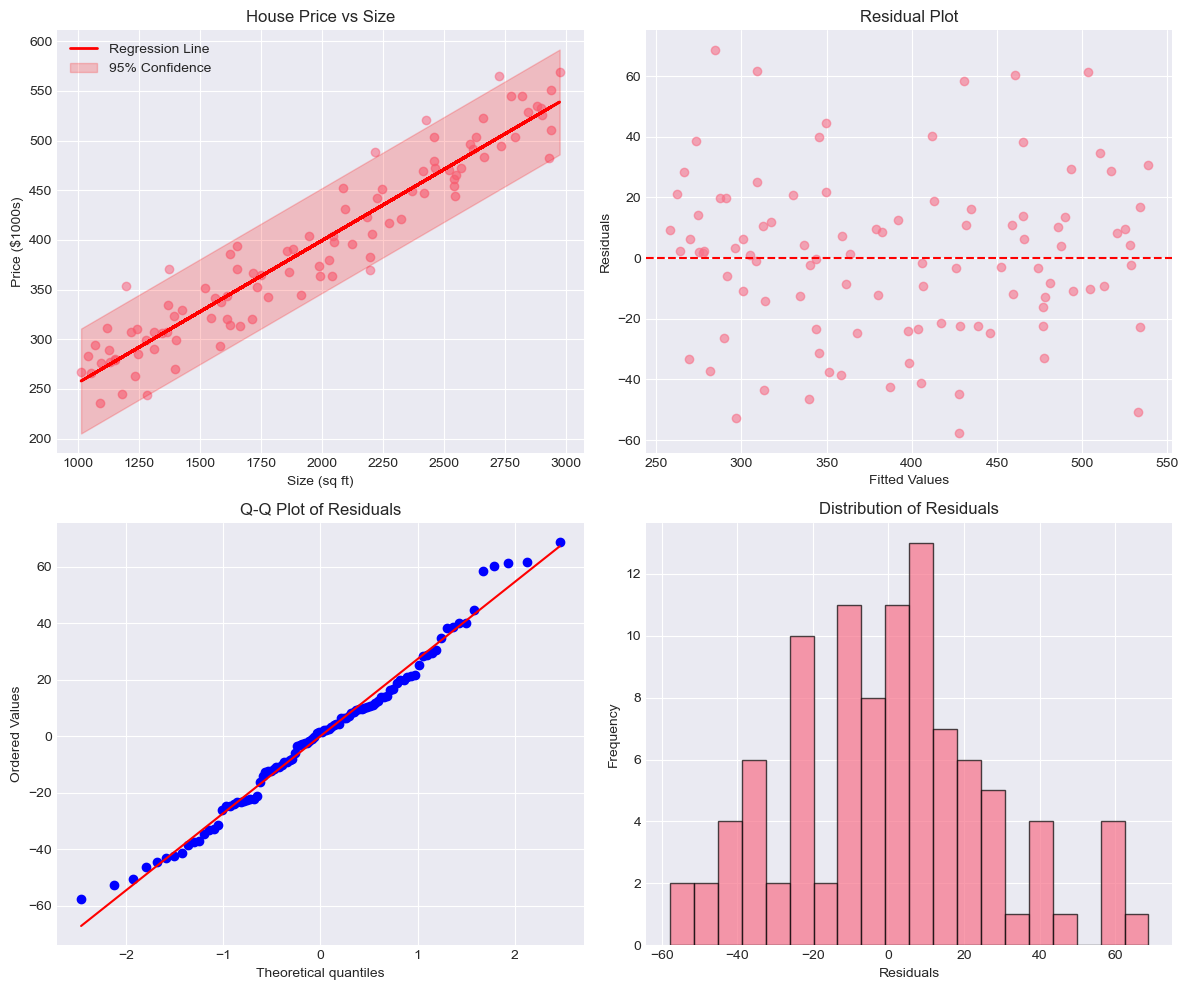


💡 Interpretation:
• Each additional sq ft increases price by $143
• Model explains 90.8% of price variation


In [12]:
# 5.2 Linear Regression Analysis
print("📈 LINEAR REGRESSION ANALYSIS\n" + "="*40)

# Generate data: House prices
np.random.seed(42)
n = 100
size = np.random.uniform(1000, 3000, n)  # Square feet
price = 100 + 0.15 * size + np.random.normal(0, 30, n)  # Price in $1000s

# Perform regression
slope, intercept, r_value, p_value, std_err = stats.linregress(size, price)

print("Regression Results:")
print(f"Equation: Price = {intercept:.2f} + {slope:.4f} × Size")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard error: {std_err:.4f}")

# Predictions
line = slope * size + intercept
residuals = price - line

# Confidence intervals
confidence = 0.95
predict_std = np.sqrt(np.mean(residuals**2))
margin = 1.96 * predict_std

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot with regression line
ax = axes[0, 0]
ax.scatter(size, price, alpha=0.6)
ax.plot(size, line, 'r-', linewidth=2, label='Regression Line')
ax.fill_between(sorted(size), sorted(line - margin), sorted(line + margin), 
                alpha=0.2, color='red', label='95% Confidence')
ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Price ($1000s)')
ax.set_title('House Price vs Size')
ax.legend()

# Residual plot
ax = axes[0, 1]
ax.scatter(line, residuals, alpha=0.6)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

# Q-Q plot of residuals
ax = axes[1, 0]
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot of Residuals')

# Histogram of residuals
ax = axes[1, 1]
ax.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print(f"• Each additional sq ft increases price by ${slope*1000:.0f}")
print(f"• Model explains {r_value**2*100:.1f}% of price variation")



---

## 📌 Section 6: Confidence Intervals

### 🎯 Quantifying Uncertainty

📊 CONFIDENCE INTERVALS
Population mean: 100
Confidence level: 95%
Intervals containing true mean: 95/100 = 95%


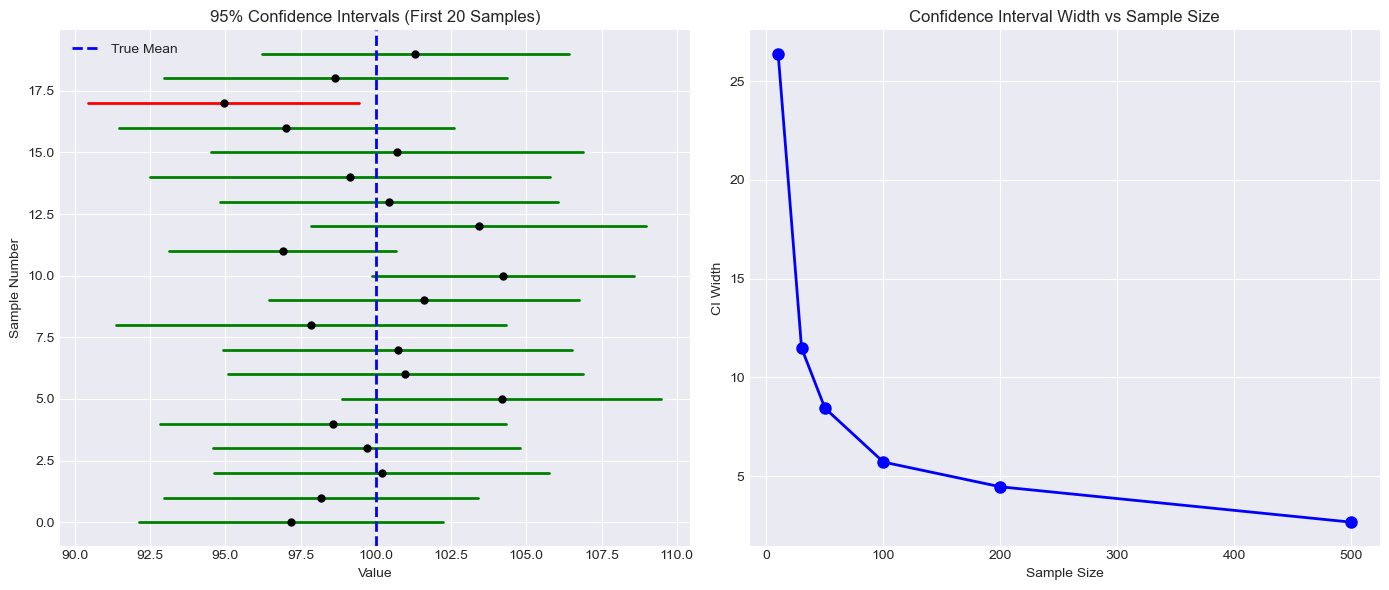


💡 Key Insights:
• 95% CI means: If we repeat sampling many times,
  95% of intervals will contain the true value
• Larger samples → Narrower intervals
• CI is about the parameter, not individual observations


In [13]:
# 6.1 Understanding Confidence Intervals
print("📊 CONFIDENCE INTERVALS\n" + "="*40)

# Simulate sampling from population
np.random.seed(42)
population_mean = 100
population_std = 15

# Take multiple samples
n_samples = 100
sample_size = 30
confidence_level = 0.95

sample_means = []
confidence_intervals = []

for _ in range(n_samples):
    sample = np.random.normal(population_mean, population_std, sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    
    # Calculate confidence interval
    margin_error = stats.t.ppf((1 + confidence_level) / 2, sample_size - 1) * (sample_std / np.sqrt(sample_size))
    ci_lower = sample_mean - margin_error
    ci_upper = sample_mean + margin_error
    
    sample_means.append(sample_mean)
    confidence_intervals.append((ci_lower, ci_upper))

# Check how many contain true mean
contains_true = sum(1 for ci in confidence_intervals if ci[0] <= population_mean <= ci[1])

print(f"Population mean: {population_mean}")
print(f"Confidence level: {confidence_level*100:.0f}%")
print(f"Intervals containing true mean: {contains_true}/{n_samples} = {contains_true}%")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot first 20 confidence intervals
for i in range(20):
    ci = confidence_intervals[i]
    color = 'green' if ci[0] <= population_mean <= ci[1] else 'red'
    ax1.plot([ci[0], ci[1]], [i, i], color=color, linewidth=2)
    ax1.plot(sample_means[i], i, 'ko', markersize=5)

ax1.axvline(population_mean, color='blue', linestyle='--', linewidth=2, label='True Mean')
ax1.set_ylabel('Sample Number')
ax1.set_xlabel('Value')
ax1.set_title('95% Confidence Intervals (First 20 Samples)')
ax1.legend()

# Effect of sample size on CI width
sample_sizes = [10, 30, 50, 100, 200, 500]
ci_widths = []

for n in sample_sizes:
    sample = np.random.normal(population_mean, population_std, n)
    sample_std = np.std(sample, ddof=1)
    margin = stats.t.ppf(0.975, n-1) * (sample_std / np.sqrt(n))
    ci_widths.append(2 * margin)

ax2.plot(sample_sizes, ci_widths, 'bo-', linewidth=2, markersize=8)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('CI Width')
ax2.set_title('Confidence Interval Width vs Sample Size')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("• 95% CI means: If we repeat sampling many times,")
print("  95% of intervals will contain the true value")
print("• Larger samples → Narrower intervals")
print("• CI is about the parameter, not individual observations")



---

## 📌 Section 7: Power Analysis and Sample Size

### 🎯 Planning Your Experiments

⚡ STATISTICAL POWER ANALYSIS
Required Sample Sizes for 80% Power:
----------------------------------------
Effect Size 0.2: n = 198 per group
Effect Size 0.5: n = 33 per group
Effect Size 0.8: n = 14 per group


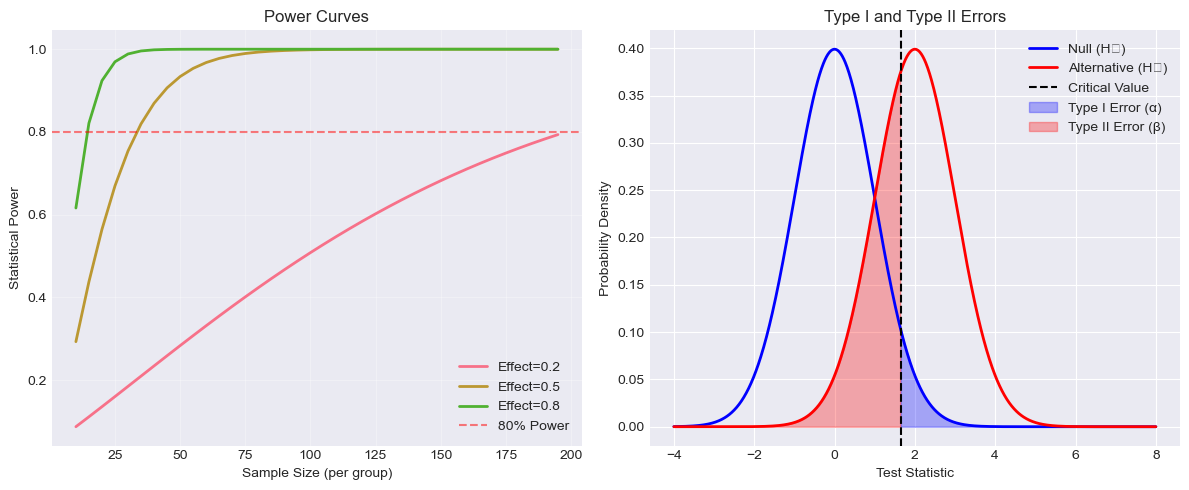


💡 Key Concepts:
• Power = Probability of detecting a true effect
• Type I Error (α) = False positive
• Type II Error (β) = False negative
• Power = 1 - β


In [15]:
# 7.1 Statistical Power and Sample Size
print("⚡ STATISTICAL POWER ANALYSIS\n" + "="*40)

from statsmodels.stats.power import TTestPower
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Power analysis for t-test
power_analysis = TTestPower()

# Effect sizes: Small (0.2), Medium (0.5), Large (0.8)
effect_sizes = [0.2, 0.5, 0.8]
alpha = 0.05
power = 0.8

print("Required Sample Sizes for 80% Power:")
print("-" * 40)
for effect_size in effect_sizes:
    n = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
    print(f"Effect Size {effect_size}: n = {n:.0f} per group")

# Visualize power curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Power vs Sample Size
sample_sizes = np.arange(10, 200, 5)
for effect_size in effect_sizes:
    # Use solve_power with power=None to calculate power
    powers = [power_analysis.solve_power(effect_size=effect_size, 
                                         nobs=n, 
                                         alpha=alpha,
                                         power=None)  # This calculates power
              for n in sample_sizes]
    ax1.plot(sample_sizes, powers, linewidth=2, label=f'Effect={effect_size}')

ax1.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='80% Power')
ax1.set_xlabel('Sample Size (per group)')
ax1.set_ylabel('Statistical Power')
ax1.set_title('Power Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Type I and Type II Errors
x = np.linspace(-4, 8, 1000)
null_dist = norm.pdf(x, 0, 1)
alt_dist = norm.pdf(x, 2, 1)

ax2.plot(x, null_dist, 'b-', linewidth=2, label='Null (H₀)')
ax2.plot(x, alt_dist, 'r-', linewidth=2, label='Alternative (H₁)')

# Critical value
crit_val = norm.ppf(1 - alpha)
ax2.axvline(crit_val, color='black', linestyle='--', label='Critical Value')

# Shade regions
ax2.fill_between(x[x > crit_val], 0, null_dist[x > crit_val], 
                 alpha=0.3, color='blue', label='Type I Error (α)')
ax2.fill_between(x[x < crit_val], 0, alt_dist[x < crit_val], 
                 alpha=0.3, color='red', label='Type II Error (β)')

ax2.set_xlabel('Test Statistic')
ax2.set_ylabel('Probability Density')
ax2.set_title('Type I and Type II Errors')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 Key Concepts:")
print("• Power = Probability of detecting a true effect")
print("• Type I Error (α) = False positive")
print("• Type II Error (β) = False negative")
print("• Power = 1 - β")

---

## 📌 Section 8: Bayesian Statistics

### 🎯 Updating Beliefs with Evidence

🔄 BAYESIAN STATISTICS


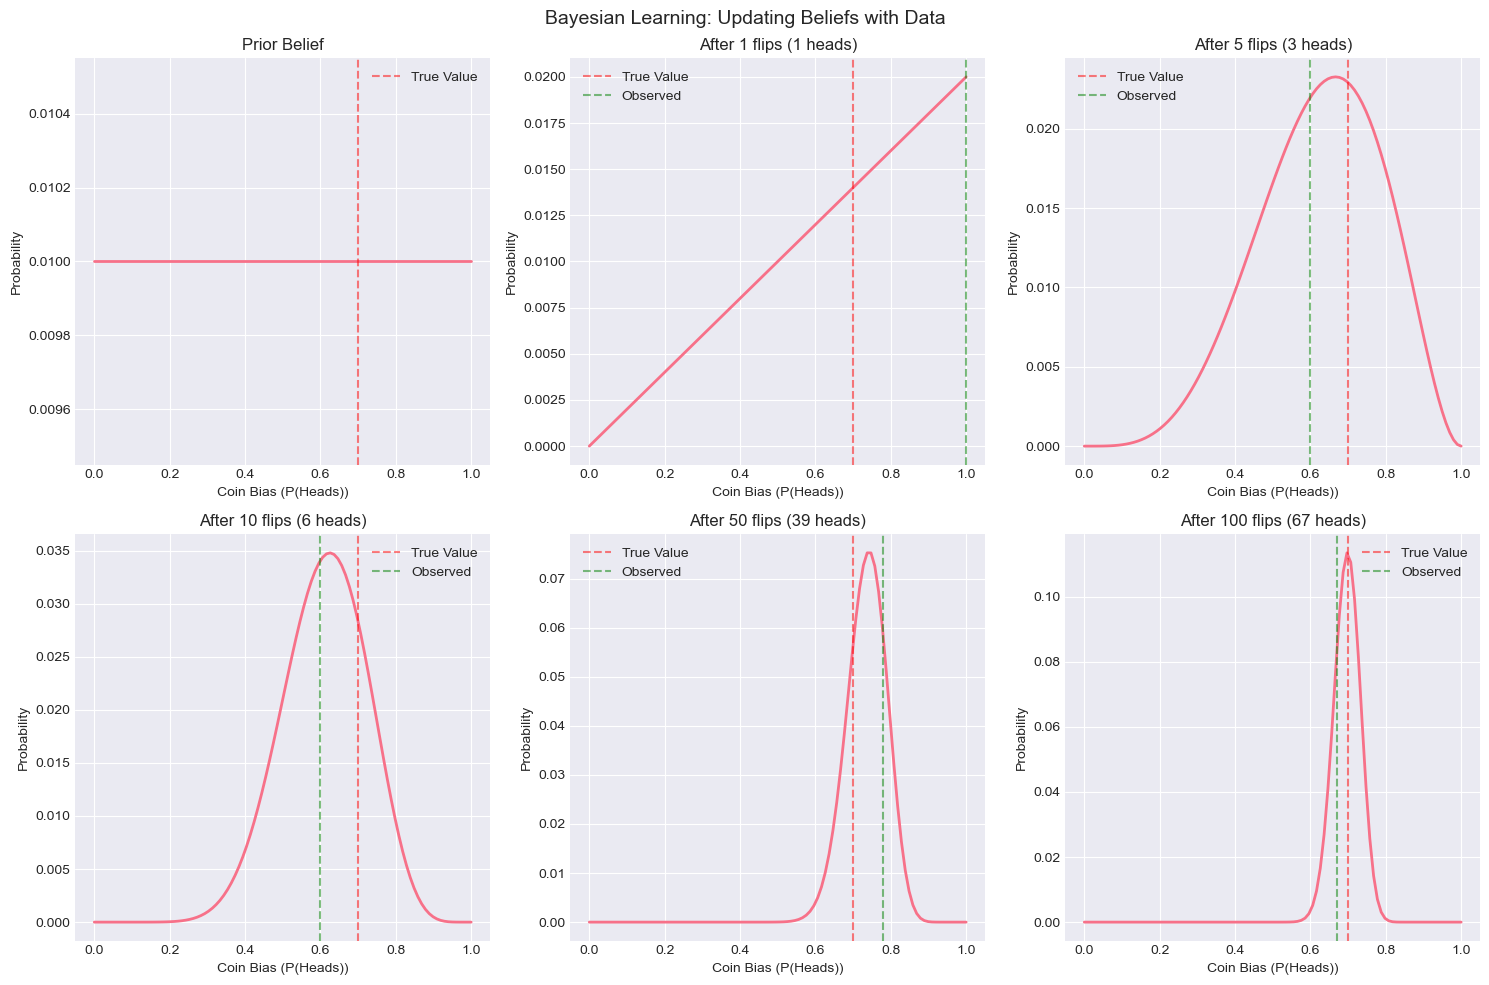


💡 Bayesian vs Frequentist:
• Bayesian: Probability = Degree of belief
• Frequentist: Probability = Long-run frequency
• Bayesian explicitly incorporates prior knowledge
• Posterior becomes more concentrated with more data


In [17]:
# 8.1 Bayesian Updating
print("🔄 BAYESIAN STATISTICS\n" + "="*40)

# Coin flip example: Is the coin fair?
# Prior belief: Uniform (any bias equally likely)
# Data: Observe coin flips

# Prior
theta_range = np.linspace(0, 1, 100)
prior = np.ones_like(theta_range)  # Uniform prior
prior = prior / np.sum(prior)

# Simulate coin flips
np.random.seed(42)
true_bias = 0.7  # Actual bias (unknown to us)
n_flips = [0, 1, 5, 10, 50, 100]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, n in enumerate(n_flips):
    ax = axes[i]
    
    if n == 0:
        posterior = prior
        heads = 0
    else:
        # Generate data
        flips = np.random.random(n) < true_bias
        heads = np.sum(flips)
        
        # Calculate likelihood
        likelihood = theta_range**heads * (1-theta_range)**(n-heads)
        
        # Calculate posterior
        posterior = prior * likelihood
        posterior = posterior / np.sum(posterior)
    
    # Plot
    ax.plot(theta_range, posterior, linewidth=2)
    ax.axvline(true_bias, color='red', linestyle='--', alpha=0.5, label='True Value')
    if n > 0:
        ax.axvline(heads/n, color='green', linestyle='--', alpha=0.5, label='Observed')
    
    ax.set_xlabel('Coin Bias (P(Heads))')
    ax.set_ylabel('Probability')
    ax.set_title(f'After {n} flips ({heads} heads)' if n > 0 else 'Prior Belief')
    ax.legend()
    
    # Update prior for next iteration
    if n > 0:
        prior = posterior

plt.suptitle('Bayesian Learning: Updating Beliefs with Data', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Bayesian vs Frequentist:")
print("• Bayesian: Probability = Degree of belief")
print("• Frequentist: Probability = Long-run frequency")
print("• Bayesian explicitly incorporates prior knowledge")
print("• Posterior becomes more concentrated with more data")


---

## 📌 Section 9: Time Series Basics

### 🎯 Analyzing Data Over Time

📈 TIME SERIES ANALYSIS


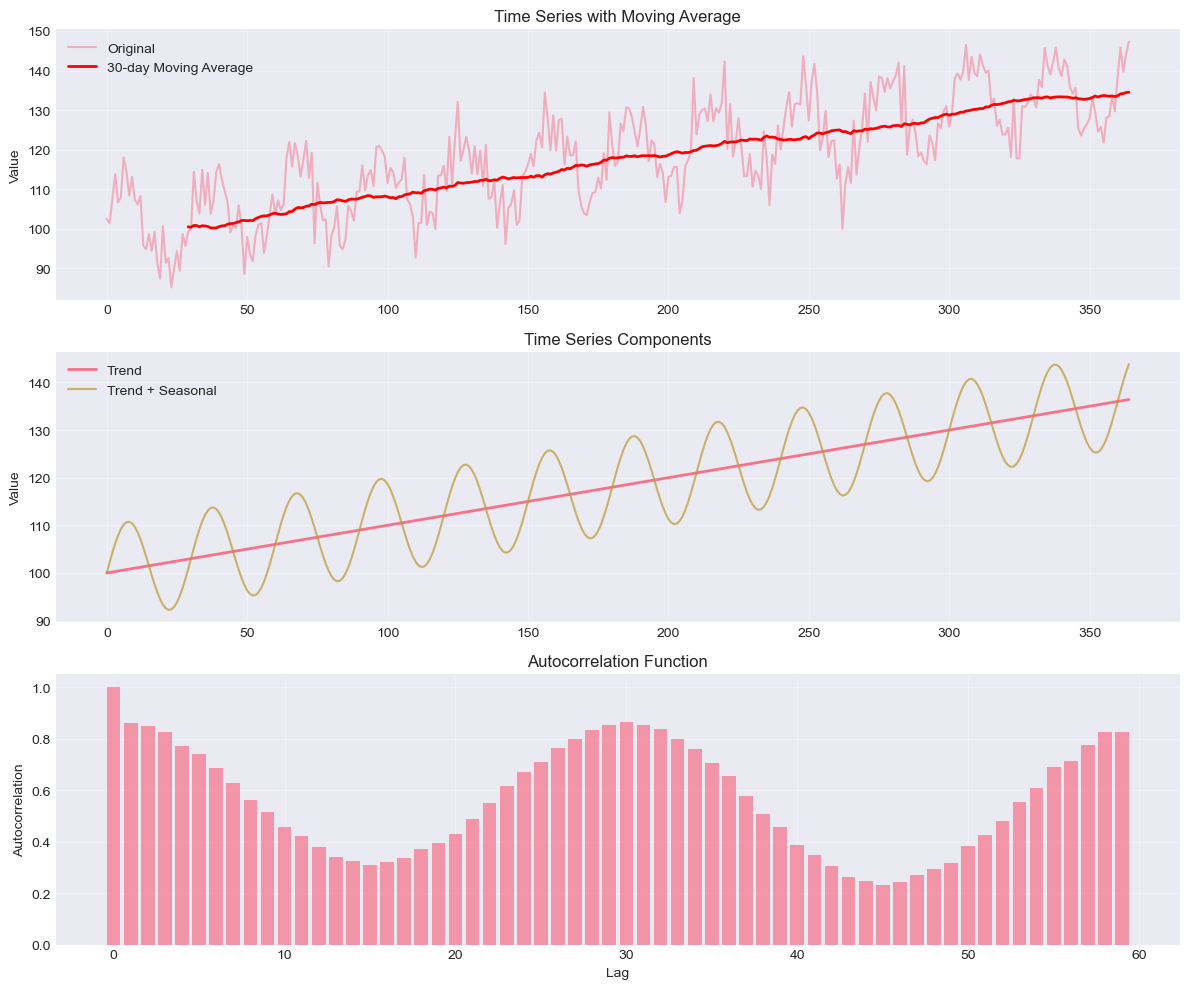


💡 Time Series Components:
• Trend: Long-term direction
• Seasonality: Repeating patterns
• Noise: Random fluctuations
• Autocorrelation: Correlation with past values


In [18]:
# 9.1 Time Series Analysis
print("📈 TIME SERIES ANALYSIS\n" + "="*40)

# Generate time series data
np.random.seed(42)
n_points = 365
time = np.arange(n_points)

# Components
trend = 100 + 0.1 * time
seasonal = 10 * np.sin(2 * np.pi * time / 30)  # Monthly pattern
noise = np.random.normal(0, 5, n_points)
series = trend + seasonal + noise

# Calculate moving average
window = 30
moving_avg = pd.Series(series).rolling(window=window).mean()

# Visualize
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Original series
ax = axes[0]
ax.plot(time, series, alpha=0.5, label='Original')
ax.plot(time, moving_avg, 'r-', linewidth=2, label=f'{window}-day Moving Average')
ax.set_ylabel('Value')
ax.set_title('Time Series with Moving Average')
ax.legend()
ax.grid(True, alpha=0.3)

# Decomposition
ax = axes[1]
ax.plot(time, trend, label='Trend', linewidth=2)
ax.plot(time, trend + seasonal, label='Trend + Seasonal', alpha=0.7)
ax.set_ylabel('Value')
ax.set_title('Time Series Components')
ax.legend()
ax.grid(True, alpha=0.3)

# Autocorrelation
ax = axes[2]
lags = range(60)
acf = [pd.Series(series).autocorr(lag) for lag in lags]
ax.bar(lags, acf, alpha=0.7)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Time Series Components:")
print("• Trend: Long-term direction")
print("• Seasonality: Repeating patterns")
print("• Noise: Random fluctuations")
print("• Autocorrelation: Correlation with past values")




---

## 🎯 Section 10: Real Business Applications

### Putting It All Together

💼 BUSINESS CASE: CUSTOMER CHURN ANALYSIS
📊 Dataset Overview:
            tenure  monthly_charges  total_charges  support_calls
count  1000.000000      1000.000000    1000.000000    1000.000000
mean     29.415393        60.561384    1794.726631       1.968000
std      17.528242        23.375191    1343.625950       1.356029
min       0.277921        20.257461    -195.865907       0.000000
25%      14.158396        39.285942     741.843477       1.000000
50%      29.808443        61.498713    1500.052844       2.000000
75%      44.659175        80.837205    2662.500193       3.000000
max      59.983060        99.953098    5850.451234       6.000000

Churn Rate: 21.8%

📈 Statistical Tests:

Tenure Comparison:
Churned: 34.9 months
Retained: 27.9 months
T-test p-value: 0.0000

🔗 Correlation with Churn:
tenure: 0.165
monthly_charges: -0.066
support_calls: 0.177


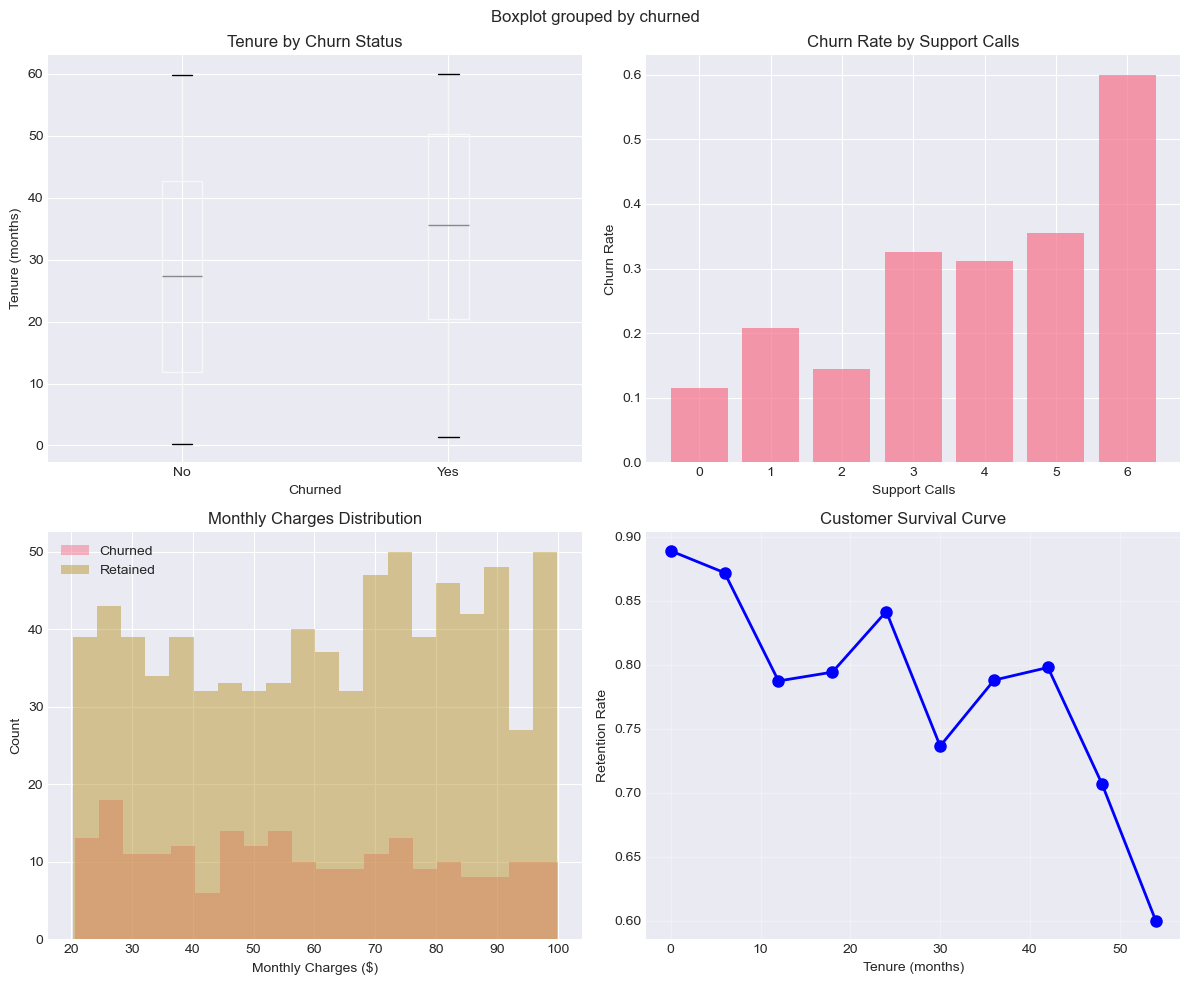


💡 Business Insights:
• Longer tenure strongly associated with retention
• Support calls are a key churn indicator
• Focus retention efforts on new customers
• Improve customer support to reduce churn


In [19]:
# 10.1 Complete Business Analysis
print("💼 BUSINESS CASE: CUSTOMER CHURN ANALYSIS\n" + "="*50)

# Generate customer data
np.random.seed(42)
n_customers = 1000

# Features
tenure = np.random.uniform(0, 60, n_customers)  # Months
monthly_charges = np.random.uniform(20, 100, n_customers)
total_charges = tenure * monthly_charges + np.random.normal(0, 100, n_customers)
support_calls = np.random.poisson(2, n_customers)

# Churn probability based on features
churn_prob = 1 / (1 + np.exp(-(-2 + 0.02*tenure - 0.01*monthly_charges + 0.3*support_calls)))
churned = np.random.random(n_customers) < churn_prob

# Create DataFrame
df = pd.DataFrame({
    'tenure': tenure,
    'monthly_charges': monthly_charges,
    'total_charges': total_charges,
    'support_calls': support_calls,
    'churned': churned
})

print("📊 Dataset Overview:")
print(df.describe())
print(f"\nChurn Rate: {df['churned'].mean()*100:.1f}%")

# Statistical Analysis
print("\n📈 Statistical Tests:")

# T-test: Tenure difference
churned_tenure = df[df['churned']]['tenure']
retained_tenure = df[~df['churned']]['tenure']
t_stat, p_val = stats.ttest_ind(churned_tenure, retained_tenure)
print(f"\nTenure Comparison:")
print(f"Churned: {churned_tenure.mean():.1f} months")
print(f"Retained: {retained_tenure.mean():.1f} months")
print(f"T-test p-value: {p_val:.4f}")

# Correlation analysis
print("\n🔗 Correlation with Churn:")
for col in ['tenure', 'monthly_charges', 'support_calls']:
    corr = df[col].corr(df['churned'].astype(int))
    print(f"{col}: {corr:.3f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Churn by tenure
ax = axes[0, 0]
df.boxplot(column='tenure', by='churned', ax=ax)
ax.set_title('Tenure by Churn Status')
ax.set_xlabel('Churned')
ax.set_ylabel('Tenure (months)')
plt.sca(ax)
plt.xticks([1, 2], ['No', 'Yes'])

# Churn by support calls
ax = axes[0, 1]
churn_by_calls = df.groupby('support_calls')['churned'].mean()
ax.bar(churn_by_calls.index, churn_by_calls.values, alpha=0.7)
ax.set_xlabel('Support Calls')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Support Calls')

# Monthly charges distribution
ax = axes[1, 0]
ax.hist(df[df['churned']]['monthly_charges'], alpha=0.5, label='Churned', bins=20)
ax.hist(df[~df['churned']]['monthly_charges'], alpha=0.5, label='Retained', bins=20)
ax.set_xlabel('Monthly Charges ($)')
ax.set_ylabel('Count')
ax.set_title('Monthly Charges Distribution')
ax.legend()

# Survival curve
ax = axes[1, 1]
tenure_bins = np.arange(0, 61, 6)
survival_rates = []
for i in range(len(tenure_bins)-1):
    mask = (df['tenure'] >= tenure_bins[i]) & (df['tenure'] < tenure_bins[i+1])
    survival_rate = 1 - df[mask]['churned'].mean()
    survival_rates.append(survival_rate)

ax.plot(tenure_bins[:-1], survival_rates, 'bo-', linewidth=2, markersize=8)
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Retention Rate')
ax.set_title('Customer Survival Curve')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Business Insights:")
print("• Longer tenure strongly associated with retention")
print("• Support calls are a key churn indicator")
print("• Focus retention efforts on new customers")
print("• Improve customer support to reduce churn")

----

## 🎯 Summary & Next Steps

### 🏆 What You've Learned:

✅ **Descriptive Statistics**
- Central tendency and spread
- Visualizing distributions
- Understanding your data

✅ **Probability & Distributions**
- Basic probability concepts
- Common distributions
- Central Limit Theorem

✅ **Inferential Statistics**
- Hypothesis testing
- Confidence intervals
- Statistical power

✅ **Relationships in Data**
- Correlation analysis
- Linear regression
- Time series basics

✅ **Applied Statistics**
- A/B testing
- Bayesian thinking
- Business applications

### 🚀 Next Steps:

1. **Practice with Real Data** - Apply these techniques
2. **Learn Data Preprocessing** - Next notebook!
3. **Master EDA** - Exploratory Data Analysis
4. **Apply to ML** - Statistics powers machine learning

### 💡 Key Takeaways:

- **Statistics is about understanding uncertainty**
- **Always visualize your data**
- **Choose the right test for your question**
- **Interpret results in business context**

### 📚 Resources:

- Think Stats by Allen B. Downey
- Statistics in Plain English
- Khan Academy Statistics
- StatQuest YouTube Channel

---

## 🎉 Congratulations!

You now understand the essential statistics for data science!

Remember: **Statistics is the bridge between data and decisions.**

**Keep exploring, keep questioning, keep learning!** 🚀

In [20]:
# 🎊 Chapter Complete!
print("🎊" * 20)
print("\n    🏆 STATISTICS FOR DATA SCIENCE COMPLETE! 🏆")
print("\n    You've mastered:")
print("    ✅ Descriptive Statistics")
print("    ✅ Probability & Distributions")
print("    ✅ Hypothesis Testing")
print("    ✅ Regression & Correlation")
print("    ✅ Business Applications")
print("\n    Ready for: Data Preprocessing!")
print("\n" + "🎊" * 20)

🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊

    🏆 STATISTICS FOR DATA SCIENCE COMPLETE! 🏆

    You've mastered:
    ✅ Descriptive Statistics
    ✅ Probability & Distributions
    ✅ Hypothesis Testing
    ✅ Regression & Correlation
    ✅ Business Applications

    Ready for: Data Preprocessing!

🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊
